In [3]:
import pandas as pd
import numpy as np
import datetime

In [47]:
objects = ["cat1", "cat2", "cat3", "cat4", "cat5"]
avg_time = [50, 100, 300, 10, 150]
models = ["model1", "model2", "model3"]
multiplier_by_model = [
    [1.25, 1.00, 0.75, 1.0, 1.25],
    [1.00, 1.25, 1.35, 0.5, 0.75],
    [0.75, 0.75, 0.90, 1.5, 1.0],
]
success_rate = [0.9, 0.8, 0.5, 0.1, 0.9]

In [22]:
# Random times of day. 100 per day
days = []
MINUTES_PER_DAY = 24*60
# 30 days in June
start_date = datetime.datetime(2023, 6, 1)
N_DAYS=30
N_PER_DAY=1000
for i in range(N_DAYS): 
    for j in range(N_PER_DAY):
        minutes_since_start=np.random.randint(1, MINUTES_PER_DAY-1)
        days.append(start_date + datetime.timedelta(days=i) + datetime.timedelta(minutes=minutes_since_start))

In [23]:
days.sort()

In [24]:
days[1:20000:1000]

[datetime.datetime(2023, 6, 1, 0, 1),
 datetime.datetime(2023, 6, 2, 0, 5),
 datetime.datetime(2023, 6, 3, 0, 3),
 datetime.datetime(2023, 6, 4, 0, 5),
 datetime.datetime(2023, 6, 5, 0, 5),
 datetime.datetime(2023, 6, 6, 0, 4),
 datetime.datetime(2023, 6, 7, 0, 3),
 datetime.datetime(2023, 6, 8, 0, 3),
 datetime.datetime(2023, 6, 9, 0, 2),
 datetime.datetime(2023, 6, 10, 0, 1),
 datetime.datetime(2023, 6, 11, 0, 1),
 datetime.datetime(2023, 6, 12, 0, 3),
 datetime.datetime(2023, 6, 13, 0, 1),
 datetime.datetime(2023, 6, 14, 0, 2),
 datetime.datetime(2023, 6, 15, 0, 1),
 datetime.datetime(2023, 6, 16, 0, 2),
 datetime.datetime(2023, 6, 17, 0, 1),
 datetime.datetime(2023, 6, 18, 0, 3),
 datetime.datetime(2023, 6, 19, 0, 5),
 datetime.datetime(2023, 6, 20, 0, 1)]

In [38]:
model_object_pair = np.array([(mod, obj) for mod in models for obj in objects])

In [42]:
sample_model = np.random.choice(model_object_pair.shape[0], (N_DAYS*N_PER_DAY,))
sample_model.shape

(30000,)

In [48]:
row = []
for i, pair in enumerate(sample_model):
    obj = pair // len(models)
    model = pair%len(models)
    row.append([
        days[i], 
        models[model], 
        objects[obj], 
        np.random.normal(avg_time[obj] * multiplier_by_model[model][obj]),
        np.random.random()<success_rate[obj], 
    ])


In [49]:
print(len(row))

30000


In [51]:
df = pd.DataFrame(row, columns=["timestamp", "model", "object_category", "time taken [ms]", "success"])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        30000 non-null  datetime64[ns]
 1   model            30000 non-null  object        
 2   object_category  30000 non-null  object        
 3   time taken [ms]  30000 non-null  float64       
 4   success          30000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 966.9+ KB


In [53]:
df.head(10)

,timestamp,model,object_category,time taken [ms],success
0,2023-06-01 00:01:00,model2,cat5,113.483950,False
1,2023-06-01 00:01:00,model3,cat1,35.963676,True
2,2023-06-01 00:03:00,model3,cat1,36.592723,True
3,2023-06-01 00:03:00,model2,cat1,49.708418,True
4,2023-06-01 00:04:00,model2,cat4,5.167378,False
5,2023-06-01 00:05:00,model2,cat4,5.241701,True
6,2023-06-01 00:08:00,model3,cat1,38.596281,True
7,2023-06-01 00:08:00,model2,cat5,111.823117,True
8,2023-06-01 00:16:00,model2,cat3,404.890659,False
9,2023-06-01 00:16:00,model1,cat2,97.717977,True


In [55]:
df.to_csv("generative_model.csv")

In [56]:
# Random times of day. 100 per day
days = []
MINUTES_PER_DAY = 24*60
# 10 days in July
start_date = datetime.datetime(2023, 7, 1)
N_DAYS=10
N_PER_DAY=1000
for i in range(N_DAYS): 
    for j in range(N_PER_DAY):
        minutes_since_start=np.random.randint(1, MINUTES_PER_DAY-1)
        days.append(start_date + datetime.timedelta(days=i) + datetime.timedelta(minutes=minutes_since_start))
        
days.sort()

In [57]:
sample_model = np.random.choice(model_object_pair.shape[0], (N_DAYS*N_PER_DAY,))
sample_model.shape

(10000,)

In [60]:
for i in range(len(sample_model)):
    if np.mod(sample_model[i], len(models)) == 0:
        sample_model[i] = np.random.choice([0,1,3])*len(models)

In [65]:
row = []
for i, pair in enumerate(sample_model):
    obj = pair // len(models)
    model = pair%len(models)
    multiplier = 2 if model == 0 else 1
    row.append([
        days[i], 
        models[model], 
        objects[obj], 
        multiplier*np.random.normal(avg_time[obj] * multiplier_by_model[model][obj]),
        np.random.random()<success_rate[obj], 
    ])


In [66]:
df_july = pd.DataFrame(row, columns=["timestamp", "model", "object_category", "time taken [ms]", "success"])

<AxesSubplot:>

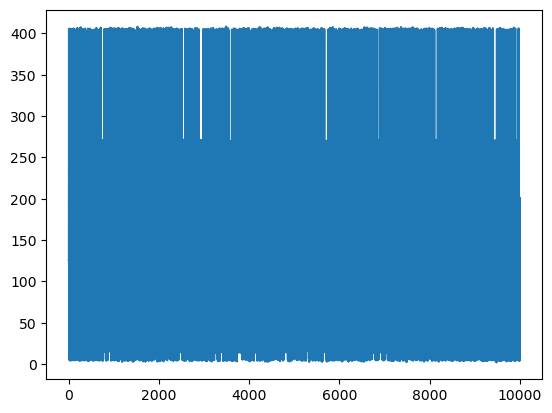

In [67]:
df_july["time taken [ms]"].plot()

<AxesSubplot:>

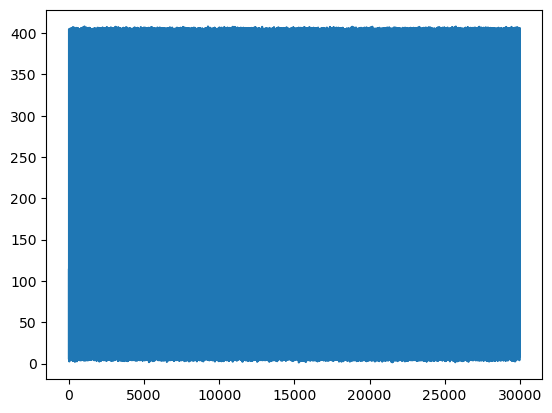

In [64]:
df["time taken [ms]"].plot()

In [68]:
df_july.to_csv("generative_model_july.csv")

<AxesSubplot:>

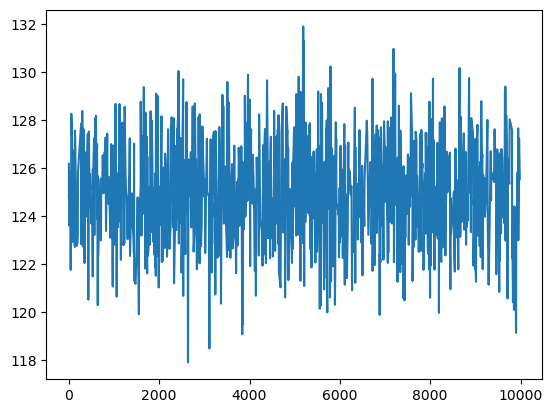

In [78]:
df_july.query("model == 'model1'").query("object_category == 'cat1'")["time taken [ms]"].plot()

<AxesSubplot:>

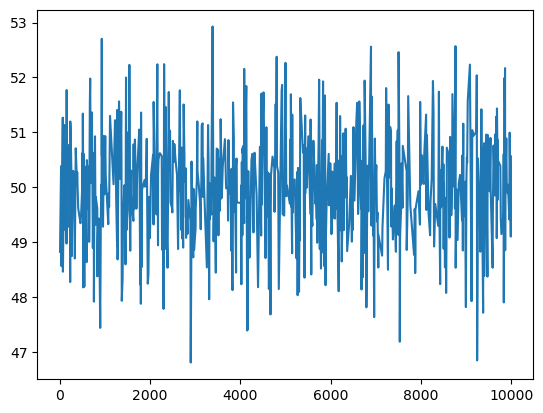

In [79]:
df_july.query("model == 'model2'").query("object_category == 'cat1'")["time taken [ms]"].plot()

<AxesSubplot:>

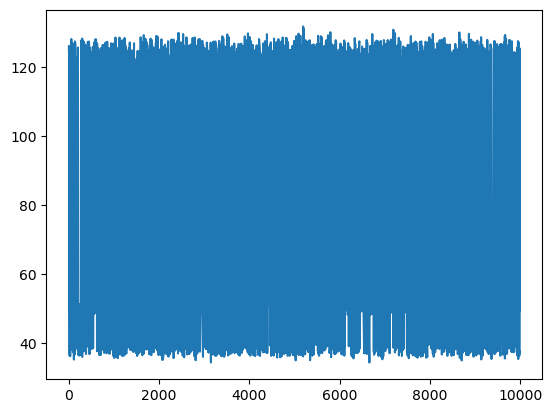

In [81]:
df_july.query("object_category == 'cat1'")["time taken [ms]"].plot()

In [89]:
avg_cat1 = df_july.query("model == 'model1'")["time taken [ms]"].mean()
avg_cat1

117.936965921331

In [90]:
avg_cat1_old = df.query("model == 'model1'")["time taken [ms]"].mean()
avg_cat1_old

116.67808373210694

In [93]:
gb = df_july.groupby(by="model")
gb.size()

model
model1    3325
model2    3368
model3    3307
dtype: int64

In [107]:
gb = df.assign(ModelObjectCombo=lambda df : df.model + " "  + df.object_category).groupby(by="ModelObjectCombo")

In [111]:

gb.mean()

,time taken [ms],success
ModelObjectCombo,,
model1 cat1,62.519569,0.897539
model1 cat2,99.972488,0.801086
model1 cat3,225.006165,0.508693
model1 cat4,9.993336,0.097549
model1 cat5,187.478885,0.879699
model2 cat1,50.000251,0.888119
model2 cat2,125.044389,0.797909
model2 cat3,405.005853,0.505688
model2 cat4,5.002831,0.103139


In [112]:
gb_july = df_july.assign(ModelObjectCombo=lambda df : df.model + " "  + df.object_category).groupby(by="ModelObjectCombo")
gb_july.mean()

,time taken [ms],success
ModelObjectCombo,,
model1 cat1,124.925524,0.902894
model1 cat2,200.133233,0.814189
model1 cat4,19.988250,0.109346
model2 cat1,49.958030,0.898135
model2 cat2,125.044413,0.789902
model2 cat3,404.984845,0.488338
model2 cat4,4.987696,0.104046
model2 cat5,112.474993,0.902798
model3 cat1,37.505626,0.907121
